**Customer Churn Prediction Project**

**Importing dependencies**

In [238]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Data Collection**

In [239]:
# Loading the dataset into a pandas dataframe
churn_df = pd.read_csv("customer_churn_data.csv")

In [240]:
# Getting the first five rows of the dataset
churn_df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,None,2208.32,No,Yes


In [241]:
# Getting the number of rows and columns of the dataset
churn_df.shape

(1000, 10)

In [242]:
# Getting some basic info about the dataset
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  1000 non-null   object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.2+ KB


In [243]:
# Checking for missing values
churn_df.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [244]:
# Getting statistical inference from the dataset
churn_df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [245]:
# Converting the string "None" to the boolean statement None
churn_df["InternetService"] = churn_df["InternetService"].replace({"None": None})
churn_df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

**Filling the missing values using imputation**

In [246]:
churn_df["InternetService"] = churn_df["InternetService"].fillna("")

In [247]:
# Checking for duplicate values
churn_df.duplicated().sum()

0

In [248]:
# Getting numeric columns
numeric_col = churn_df.select_dtypes(include=["number"])

In [249]:
# Correlation
numeric_col.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


**Data Visualization**

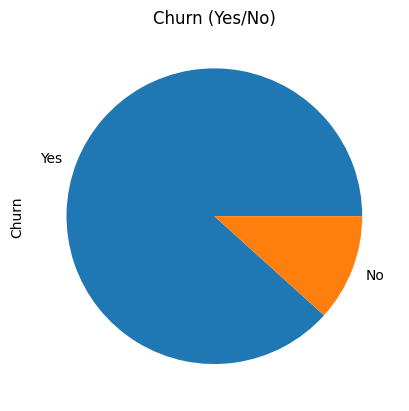

In [250]:
# Getting the number of churns
churn_df.Churn.value_counts().plot(kind="pie")
plt.title("Churn (Yes/No)")
plt.show()

In [251]:
# Grouping churns based on monthly charges
churn_df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [252]:
# Getting the number of churns based on gender
churn_gender = churn_df[["Gender", "Churn"]].value_counts().reset_index(name='count')
churn_gender

,Gender,Churn,count
0,Female,Yes,470
1,Male,Yes,413
2,Female,No,68
3,Male,No,49


In [253]:
# Visualizing using a grouped bar chart
px.bar(churn_gender, x="Gender", y="count", color="Churn", title="Customer churn based on gender", barmode="group")

In [254]:
# Grouping contract type by monthly charges
mean_churn_charges = churn_df.groupby("ContractType")["MonthlyCharges"].mean().reset_index()
mean_churn_charges

,ContractType,MonthlyCharges
0,Month-to-Month,75.909198
1,One-Year,73.822803
2,Two-Year,71.334500


In [255]:
# Conatructing a pie chart
px.pie(mean_churn_charges, values="MonthlyCharges", names="ContractType", color="ContractType", title="Contract type average monthly charges")

Text(0.5, 1.0, 'Monthly Charges Distribution')

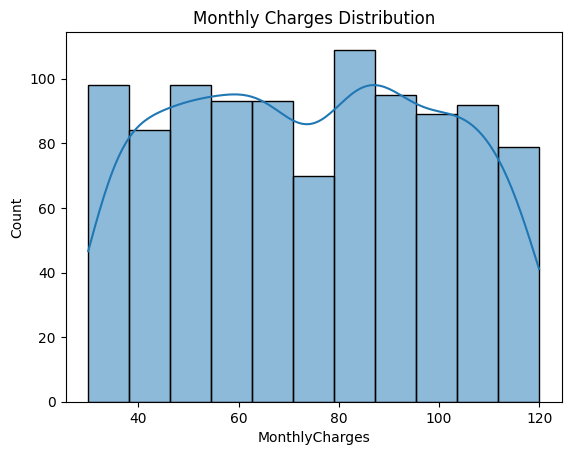

In [256]:
# Distribution of monthly charges
sns.histplot(data=churn_df, x="MonthlyCharges", kde=True)
plt.title("Monthly Charges Distribution")

Text(0.5, 1.0, 'Tenure Distribution')

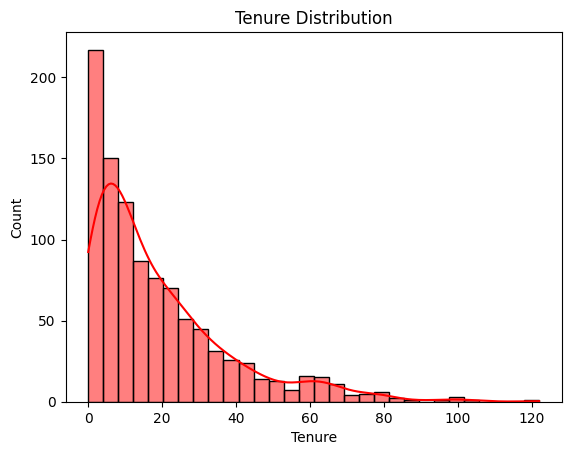

In [257]:
# Distribution of Tenure
sns.histplot(data=churn_df, x="Tenure", kde=True, color="Red")
plt.title("Tenure Distribution")

**Feature Engineering**

In [258]:
# Separating the data into features and target
X = churn_df[["Age", "Gender", "Tenure", "MonthlyCharges"]] # Features
Y = churn_df["Churn"] # Target

In [259]:
# Encoding the gender column
X["Gender"] = X["Gender"].apply(lambda x: 1 if x == "Female" else 0)
# X["Gender"] = X["Gender"].replace({"Male": 0, "Female": 1})

C:\Users\USER\AppData\Local\Temp\ipykernel_8452\2337164292.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [260]:
# Loading the updated dataset
X.head(2)

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67


In [261]:
# Encoding the target column 
Y = Y.apply(lambda y: 1 if y == "Yes" else 0)
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

**Train Test Split**

In [262]:
from sklearn.model_selection import train_test_split
# Splitting the data into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [263]:
print(X.shape, X_train.shape, X_test.shape)

(1000, 4) (800, 4) (200, 4)


In [264]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [265]:
# Scaling the training data
X_train = scaler.fit_transform(X_train)

In [266]:
# Saving the scaler as a pkl file
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [267]:
# Scaling the test data
X_test = scaler.transform(X_test)

In [268]:
X_train

array([[ 0.84282292,  0.92295821,  2.43072853,  1.00471455],
       [ 0.02055666,  0.92295821, -0.7980049 ,  0.37783143],
       [ 1.76787247,  0.92295821,  0.3476747 ,  0.75966734],
       ...,
       [-0.90449289,  0.92295821,  4.46170601,  1.71328007],
       [ 0.02055666,  0.92295821, -0.74592856, -0.58125285],
       [-0.28779319,  0.92295821, -0.01685972, -1.1049582 ]])

In [269]:
X_test

array([[-2.03510900e+00,  9.22958207e-01,  1.91445666e-01,
        -1.04985189e+00],
       [ 2.05566566e-02,  9.22958207e-01,  1.91445666e-01,
         6.29131828e-01],
       [ 2.26123222e-01,  9.22958207e-01, -1.21012408e-01,
        -1.40354841e+00],
       [-6.98926324e-01,  9.22958207e-01,  6.60132777e-01,
        -1.11863707e+00],
       [ 1.15117277e+00,  9.22958207e-01, -2.77241445e-01,
        -6.53164628e-01],
       [ 1.23339939e-01,  9.22958207e-01,  1.59750700e+00,
        -9.21661325e-01],
       [-5.96143041e-01,  9.22958207e-01,  2.43522011e-01,
        -1.55792424e+00],
       [-1.85009909e-01,  9.22958207e-01, -3.29317791e-01,
        -4.64396207e-01],
       [ 2.59013873e+00, -1.08347268e+00,  8.72929744e-02,
         3.13736144e-01],
       [ 1.15117277e+00,  9.22958207e-01,  6.60132777e-01,
         9.97288872e-01],
       [-3.90576475e-01,  9.22958207e-01, -6.93852210e-01,
        -1.79875689e-01],
       [-8.22266263e-02, -1.08347268e+00, -2.25165100e-01,
      

In [270]:
# Importing GridSearchCV and performance metrics
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [271]:
# Function to get accuracy score
def modelperformance(predictions):
    print(f"Accuracy score on model is {metrics.accuracy_score(Y_test, predictions)}")

**Logistic Regression**

In [272]:
# Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

In [273]:
# Loading the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [274]:
# Making predictions
Y_pred = logreg.predict(X_test)

In [275]:
# Calling the function
modelperformance(Y_pred)

Accuracy score on model is 0.9


**KNeighbors Classifier model**

In [276]:
# Importing the KNeighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

In [277]:
# Getting parameter grid
k_param_grid = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"]
}

In [278]:
# Using GridSearch to get the best neighbor and weight
gridkn = GridSearchCV(KNeighborsClassifier(), k_param_grid, cv=5)

In [279]:
gridkn.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [280]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

In [281]:
k_Y_pred = gridkn.predict(X_test)

In [282]:
# Calling the performance function
modelperformance(k_Y_pred)

Accuracy score on model is 0.895


**Support Vector Machine Classifier**

In [283]:
# Importing SVC
from sklearn.svm import SVC
# Loading the model
svm = SVC()

In [284]:
svc_param_grid = {
    "C": [0.01, 0.1, 0.5, 1],
    "kernel": ["linear", "rbf", "poly"]
}

In [285]:
gridsvc = GridSearchCV(svm, svc_param_grid, cv=5)
gridsvc.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [286]:
# Getting the best tuning value
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [287]:
svm_Y_pred = gridsvc.predict(X_test)

In [288]:
# Model evaluation
modelperformance(svm_Y_pred)

Accuracy score on model is 0.905


**Decision Tree model**

In [289]:
# Importing the Decision Tree model
from sklearn.tree import DecisionTreeClassifier
# Loading the model
dtc = DecisionTreeClassifier()

In [292]:
dtc_param_grid = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 8],
    "min_samples_leaf": [1, 2, 4]
}

In [293]:
grid_dtc = GridSearchCV(dtc, dtc_param_grid, cv=5)
grid_dtc.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 8],
                         'splitter': ['best', 'random']})

In [297]:
dtc_Y_pred = grid_dtc.predict(X_test)

In [296]:
# Getting the best paramters
grid_dtc.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [298]:
# Model evaluation
modelperformance(dtc_Y_pred)

Accuracy score on model is 0.875


**Random Forest Classifier**

In [299]:
# Importing the Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
# Loading the model
rfc = RandomForestClassifier()

In [300]:
rfc_param_grid = {
    "n_estimators": [32, 64, 128, 256],
    "max_features": [2, 3, 4],
    "bootstrap": [True, False]
}

In [301]:
grid_rfc = GridSearchCV(rfc, rfc_param_grid, cv=5)
grid_rfc.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [302]:
# Getting the best parameters
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 256}

In [303]:
rfc_Y_pred = grid_rfc.predict(X_test)

In [304]:
# Performance metrics
modelperformance(rfc_Y_pred)

Accuracy score on model is 0.875


**From all the models used to make predictions using accuracy score, we can conclude that SVC is the best model with the highest accuracy score of 0.905(90.5%)**

In [306]:
# Getting the best estimator for the svc model
best_model = gridsvc.best_estimator_
best_model

SVC(C=0.01, kernel='linear')

In [307]:
# Saving the model
joblib.dump(best_model, "model.pkl")

['model.pkl']

In [308]:
X.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')